In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re


playlistDF = pd.read_csv("../data/processed_data.csv")
playlistDF.drop(columns=["Unnamed: 0",'Unnamed: 0.1'], inplace = True)
playlistDF.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,name,danceability,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,w o r k o u t,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,party playlist,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Dance mix,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,spin,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69


In [7]:
def data_preprocessing(df):

    # multiple playlist can have duplicate songs => drop
    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)
    df.drop_duplicates('artists_song', inplace=True)

    # select useful cols
    df = df[['artist_name','id','track_name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "artist_pop", "genres", "track_pop"]]

    # process genre data to list
    df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))

    return df

songDF = data_preprocessing(playlistDF)
songDF.head()

/var/folders/gn/1mt108vs6fg2tcd9zfjfqfm40000gn/T/ipykernel_22194/2071701248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))


,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"[dance_pop, hip_hop, hip_pop, pop, pop_rap, r&..."
6,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"[dance_pop, pop, post-teen_pop]"
19,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"[dance_pop, pop, r&b]"
46,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"[dance_pop, pop]"
55,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"[pop_rap, reggae_fusion]"


# FEATURE ENGINEERING

## SENTIMENT LABELS
In our data, we will create a sentimel label of the track name using subjectivity and polarity form TextBlob package.

- Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
- Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.

## ONE HOT ENCODING
Turn subjectivity into one hot vector, i.e converting each category into a column so that each category can be represented as either True or False (1 or 0)


In [5]:
# Sentiment labels
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getLabel(score, task="polarity"):
    '''
    Categorizing the Polarity & Subjectivity score
    '''
    if task == "subjectivity":
        if score < 1/3:
            return "low"
        elif score > 1/3:
            return "high"
        else:
            return "medium"
    else:
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'

def sentiment_label(df, text_col):
    '''
    Create sentiment label on text
    ---
    Input:
    df (pandas dataframe): Dataframe of interest
    text_col (str): column of interest
    '''
    df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getLabel(x,"subjectivity"))
    df['polarity'] = df[text_col].apply(getPolarity).apply(getLabel, "polarity")
    return df

In [ ]:
# one hot encoding

def ohe_prep(df, column, new_name): 
    # turn a feature to one hot encoding 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

## TF-IDF
Frequency-Inverse Document Frequency is a tool to quantify words in a set of documents

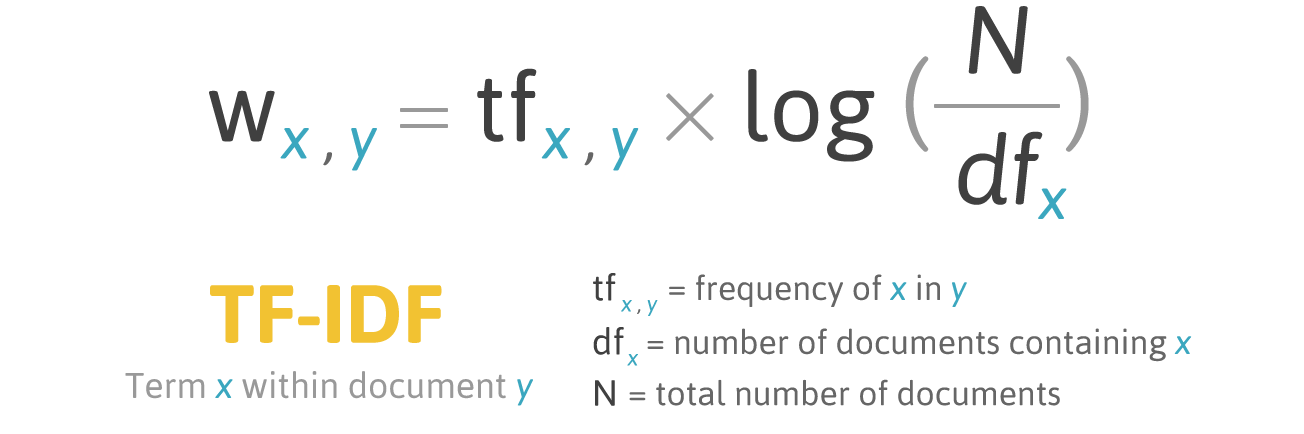


- Term Frequency (TF): The number of times a term appears in each document divided by the total word count in the document.
- Inverse Document Frequency (IDF): The log value of the document frequency. Document frequency is the total number of documents where one term is present.

In this project, songs are treated as documents, and genres are treated as words. Therefore, we can determine the weight of of each genre in each song and relatively to other songs. This approach is simply better than one hot coding because since each genre might be shared across songs so we can unbiasedly find the more reasonable weight for each genre in an individual song while also considering other songs.

In [ ]:
# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(songDF['genres_list'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
genre_df.drop(columns='genre|unknown')
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

In [8]:
# artist_pop distribution descriptive stats
print(songDF['artist_pop'].describe())

count    34247.000000
mean        61.916606
std         19.120147
min          0.000000
25%         51.000000
50%         65.000000
75%         76.000000
max        100.000000
Name: artist_pop, dtype: float64


## Normalization
Lastly, we need to normalize some variables. As shown above, since all of the features except for the popularity variables are ranging around 0 and 1. It is better to scale the artist popularity to the same basis of other variables.

In [9]:
# Normalization
pop = songDF[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,artist_pop
0,0.74
1,0.84
2,0.86
3,0.82
4,0.75
